# Regression Analysis-Homoscedasticity / Heteroscedasticity

**Homoscedasticity**: It refers to a circumstance in which the variance of a regression model’s residual, or error component, is constant. 

Homoscedasticity describes a collection of random variables in which each variable has the same finite variance, whereas heteroscedasticity describes a set of random variables in which not all variables have the same finite variance.

The difference between them can also be observed by residual plots.

![](http://questans.org/wp-content/uploads/2021/07/Difference.jpg)

### How to check for Homoscedasticity

A scatterplot of residuals vs expected values is an effective method for testing for homoscedasticity. There should be no discernible structure (cone-like structure) in the distribution; if there is, the data is heteroscedastic (as illustrated below).

![](http://questans.org/wp-content/uploads/2021/07/Cone-shape-1.png)

Furthermore, there are available tests to check if residues show Homoscedasticity or Heteroskedasticity: **Breusch-Pagan** test, **White** test. 


### References:

- [Homoscedasticity – Definition, Assumption & H-T Check!](http://questans.org/homoscedasticity/)
- [Heteroskedasticity in Linear Regressions and Python](https://medium.com/keita-starts-data-science/heteroskedasticity-in-linear-regressions-and-python-16eb57eaa09)
- [Heteroskedasticity: Breusch-Pagan and White Tests in Python](https://www.datascienceconcepts.com/tutorials/python-programming-language/heteroskedasticity-breusch-pagan-and-white-tests-in-python/)
- [What’s in a Name-Name? A Guide to Regression Diagnostics in Python’s Statsmodels Library](https://medium.com/@oguss/whats-in-a-name-name-a-guide-to-regression-diagnostics-in-python-s-statsmodels-library-549de3277d4e)
- [How to Perform a Breusch-Pagan Test in Python](https://www.statology.org/breusch-pagan-test-python/)

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# load data

In [3]:
import statsmodels.api as sm
df = sm.datasets.get_rdataset(dataname="HousePrices", package="AER", cache=True).data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       546 non-null    float64
 1   lotsize     546 non-null    int64  
 2   bedrooms    546 non-null    int64  
 3   bathrooms   546 non-null    int64  
 4   stories     546 non-null    int64  
 5   driveway    546 non-null    object 
 6   recreation  546 non-null    object 
 7   fullbase    546 non-null    object 
 8   gasheat     546 non-null    object 
 9   aircon      546 non-null    object 
 10  garage      546 non-null    int64  
 11  prefer      546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


<AxesSubplot:xlabel='lotsize', ylabel='price'>

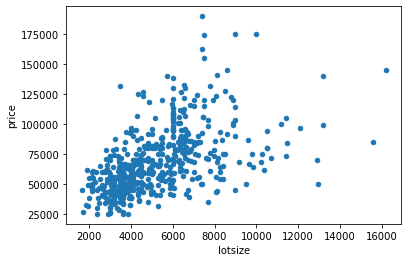

In [4]:
## example1
c1 = "lotsize"
c2 = "price"
df1 = df[[c1, c2]]
df1.plot(kind = 'scatter', x = c1 , y = c2)

In [5]:
## example2
df2 = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

In [7]:
## example3
Y = np.array([50,90,30,90,91,95,95])
X = np.array([0.5,0.9,0.4,0.7,1.1,0.75,0.8])
df3 = pd.DataFrame({"x":X, "y":Y})

# Breusch-Pagan test

It examines if the expected value of squared residuals is a linear function of independent variables. We obtain residuals from OLS and regress the squared residuals with original regressors.

![](https://miro.medium.com/max/1288/1*T9mFrF1EuYBNQv2QSyS6Xg.png)

If all the coefficients are zero, we can say there is no linear relations between residuals and regressors (Homoskedascitity). We conduct a F-test for joint significance of all δ above. We can conduct t-test or F-test for a particular δ or subset of δ to figure out if the Heteroskedasticity is attributed to a particular independent variable or set of independent variables.

Therefore, Breusch-Pagan test uses the following null and alternative hypotheses:
- The null hypothesis (H0): Homoscedasticity is present.
- The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

In [18]:
def test_breuschpagan(df:pd.DataFrame, scy:str, lcx:list, alpha:float = .05, verbose:bool = True)->bool:
    import statsmodels.formula.api as smf
    import statsmodels.tools.tools as smt
    import statsmodels.stats.diagnostic as smd
    
    # create formula
    if len(lcx) == 1:
        scx = f"{lcx[0]}"
    else:
        scx = "+".join(lcx)
    sformula = f"{scy} ~ {scx}"
    # initialize linear regression
    mlr = smf.ols(formula=sformula, data=df).fit()
    # add cte
    ivar = df[lcx]
    ivarc = smt.add_constant(data=ivar, prepend=True)
    # test
    bptest = smd.het_breuschpagan(resid=mlr.resid, exog_het=ivarc)
    stats = bptest[0]
    pvalue = bptest[1]

    # display
    if verbose:
        print(f"formula = '{sformula}'")
        print("lm_stats:", stats, "lm_pvalue:", pvalue)
    # interpret
    if pvalue > alpha:
        # display
        if verbose:
            print(f'Homoscedasticity (fail to reject H0 with alpha = {alpha})')
        # return
        return True
    else:
        # display
        if verbose:
            print(f'Heteroscedasticity (reject H0 with alpha = {alpha})')
        # return
        return False

In [12]:
test_breuschpagan(df1,"price", ["lotsize"])

formula = 'price ~ lotsize'
lm_stats: 51.5182029086298 lm_pvalue: 7.09363278725942e-13
Heteroscedasticity (reject H0 with alpha = 0.05)


False

In [15]:
test_breuschpagan(df2,"rating", ["points", "assists", "rebounds"])

formula = 'rating ~ points+assists+rebounds'
lm_stats: 6.003951995818579 lm_pvalue: 0.11141811013398897
Homoscedasticity (fail to reject H0 with alpha = 0.05)


True

In [17]:
test_breuschpagan(df3, "y", ['x'])

formula = 'y ~ x'
lm_stats: 0.284984376226874 lm_pvalue: 0.593452735252865
Homoscedasticity (fail to reject H0 with alpha = 0.05)


True

# White test

It uses more flexible specification than Breusch-Pagan test, adding squared and interaction terms of regressors.

![](https://miro.medium.com/max/1400/1*ERye64H2p5HQMVNypzZtbA.png)

Similarly to the Breusch-Pagan test, here we conduct F-test to examine joint significance of δ. While White test is more flexible than Breusch-Pagan test, we need to keep in mind that having interaction terms consumes large degrees of freedom when the specification includes a lot of regressors. 

White test uses the following null and alternative hypotheses:
- The null hypothesis (H0): Homoscedasticity is present.
- The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)

In [19]:
def test_white(df:pd.DataFrame, scy:str, lcx:list, alpha:float = .05, verbose:bool = True)->bool:
    import statsmodels.formula.api as smf
    import statsmodels.tools.tools as smt
    import statsmodels.stats.diagnostic as smd
    
    # create formula
    if len(lcx) == 1:
        scx = f"{lcx[0]}"
    else:
        scx = "+".join(lcx)
    sformula = f"{scy} ~ {scx}"
    # initialize linear regression
    mlr = smf.ols(formula=sformula, data=df).fit()
    # add cte
    ivar = df[lcx]
    ivarc = smt.add_constant(data=ivar, prepend=True)
    # test
    wtest = smd.het_white(resid=mlr.resid, exog=ivarc)
    stats = wtest[0]
    pvalue = wtest[1]
    
    # display
    if verbose:
        print(f"formula = '{sformula}'")
        print("lm_stats:", stats, "lm_pvalue:", pvalue)
    # interpret
    if pvalue > alpha:
        # display
        if verbose:
            print(f'Homoscedasticity (fail to reject H0 with alpha = {alpha})')
        # return
        return True
    else:
        # display
        if verbose:
            print(f'Heteroscedasticity (reject H0 with alpha = {alpha})')
        # return
        return False

In [20]:
test_white(df1,"price", ["lotsize"])

formula = 'price ~ lotsize'
lm_stats: 52.47054886664663 lm_pvalue: 4.037988543057762e-12
Heteroscedasticity (reject H0 with alpha = 0.05)


False

In [21]:
test_white(df2,"rating", ["points", "assists", "rebounds"])

formula = 'rating ~ points+assists+rebounds'
lm_stats: 10.0 lm_pvalue: 0.3504852123233613
Homoscedasticity (fail to reject H0 with alpha = 0.05)


True

In [22]:
test_white(df3, "y", ['x'])

formula = 'y ~ x'
lm_stats: 1.5612307772065586 lm_pvalue: 0.4581240002522854
Homoscedasticity (fail to reject H0 with alpha = 0.05)


True

# How to fix Heteroscedasticity

In the previous example we saw that heteroscedasticity was not present in the regression model. However, when heteroscedasticity actually is present there are three common ways to remedy the situation:

1. Transform the dependent variable. One way to fix heteroscedasticity is to transform the dependent variable in some way. One common transformation is to simply take the log of the dependent variable.

2. Redefine the dependent variable. Another way to fix heteroscedasticity is to redefine the dependent variable. One common way to do so is to use a rate for the dependent variable, rather than the raw value.

3. Use weighted regression. Another way to fix heteroscedasticity is to use weighted regression. This type of regression assigns a weight to each data point based on the variance of its fitted value. When the proper weights are used, this can eliminate the problem of heteroscedasticity.

Read more details about each of these three methods in this [post](https://www.statology.org/heteroscedasticity-regression/). Furthermore, there are interesting information in this [post](https://medium.com/keita-starts-data-science/heteroskedasticity-in-linear-regressions-and-python-16eb57eaa09).

### 1. Dependent variable transformation

In [27]:
df1["price_log"] = np.log(df1.price.values)
test_breuschpagan(df1,"price_log", ["lotsize"])

formula = 'price_log ~ lotsize'
lm_stats: 18.24401262553766 lm_pvalue: 1.9433585644779608e-05
Heteroscedasticity (reject H0 with alpha = 0.05)


False

In this case Heteroscedasticity is not removed but yes reduced. p-values is bigger than before. 

### 2. Redefine the dependent variable

In [29]:
df1["price_rate"] = df1.price.values / np.max(df1.price.values)
test_breuschpagan(df1,"price_log", ["lotsize"])

formula = 'price_log ~ lotsize'
lm_stats: 18.24401262553766 lm_pvalue: 1.9433585644779608e-05
Heteroscedasticity (reject H0 with alpha = 0.05)


False

In this case Heteroscedasticity is not removed but yes reduced. p-values is bigger than before. 

### 3. Use weighted regression

It is possible to use Weighted Least Squares (WLS) when you know the form of Heteroskedasticity. When we do not know the form of Heteroskedasticity, we may use Feasible Generalized Least Squares (FGLS) to use data to estimate the form. Although estimates with FGLS are biased, the result is consistent and asymptotically more efficient than OLS, when there is Heteroskedasticity. For more information about the last case, check [this](https://www.statsmodels.org/0.6.1/examples/notebooks/generated/wls.html).

In [60]:
from __future__ import print_function
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)
np.random.seed(1024)

nsample = len(df1)
w = np.ones(nsample)

In [61]:
y = df1[["price"]] 
X = df1[["lotsize"]]
y.shape, X.shape

((546, 1), (546, 1))

In [62]:
mod_wls = sm.WLS(y, X, weights=1./w)
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            WLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     3729.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          6.91e-246
Time:                        15:01:22   Log-Likelihood:                -6327.9
No. Observations:                 546   AIC:                         1.266e+04
Df Residuals:                     545   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize       12.2306      0.200     61.062      0.0

In [63]:
res_ols = sm.OLS(y, X).fit()
print(res_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     3729.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          6.91e-246
Time:                        15:01:23   Log-Likelihood:                -6327.9
No. Observations:                 546   AIC:                         1.266e+04
Df Residuals:                     545   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize       12.2306      0.200     61.062      0.0

In [64]:
resid1 = res_ols.resid[w==1.]
var1 = resid1.var(ddof=int(res_ols.df_model)+1)
resid2 = res_ols.resid[w!=1.]
var2 = resid2.var(ddof=int(res_ols.df_model)+1)
w_est = w.copy()
w_est[w!=1.] = np.sqrt(var2) / np.sqrt(var1)
res_fwls = sm.WLS(y, X, 1./w_est).fit()
print(res_fwls.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            WLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     3729.
Date:                Fri, 28 Jan 2022   Prob (F-statistic):          6.91e-246
Time:                        15:01:23   Log-Likelihood:                -6327.9
No. Observations:                 546   AIC:                         1.266e+04
Df Residuals:                     545   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lotsize       12.2306      0.200     61.062      0.0